# Mobile Price Range Prediction

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df_test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df_test.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [11]:
print ("There are {} rows in the train dataset and {} rows in the test dataset".format(
    df.shape[0],df_test.shape[0]))

There are 2000 rows in the train dataset and 1000 rows in the test dataset


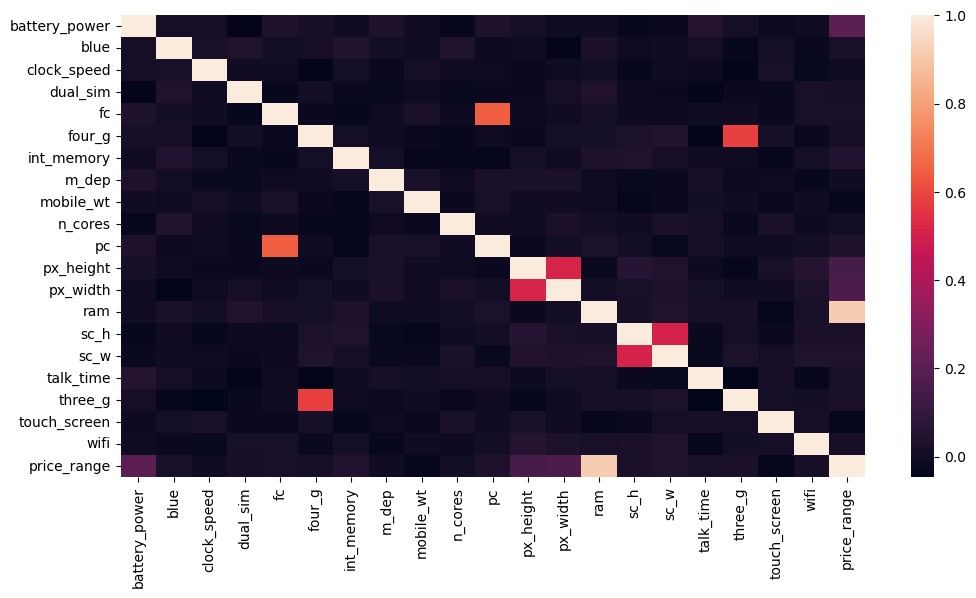

In [12]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

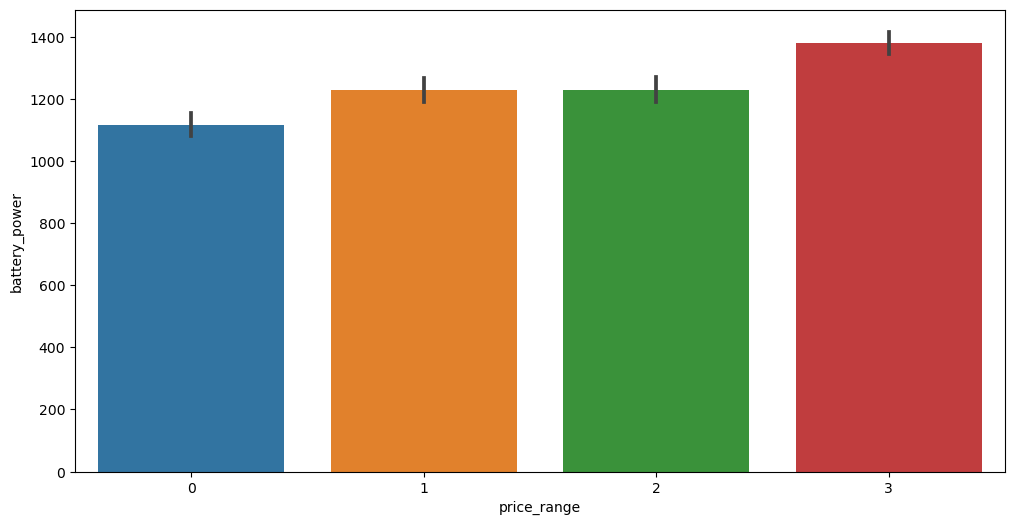

In [13]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range', y = 'battery_power', data=df)
plt.show()

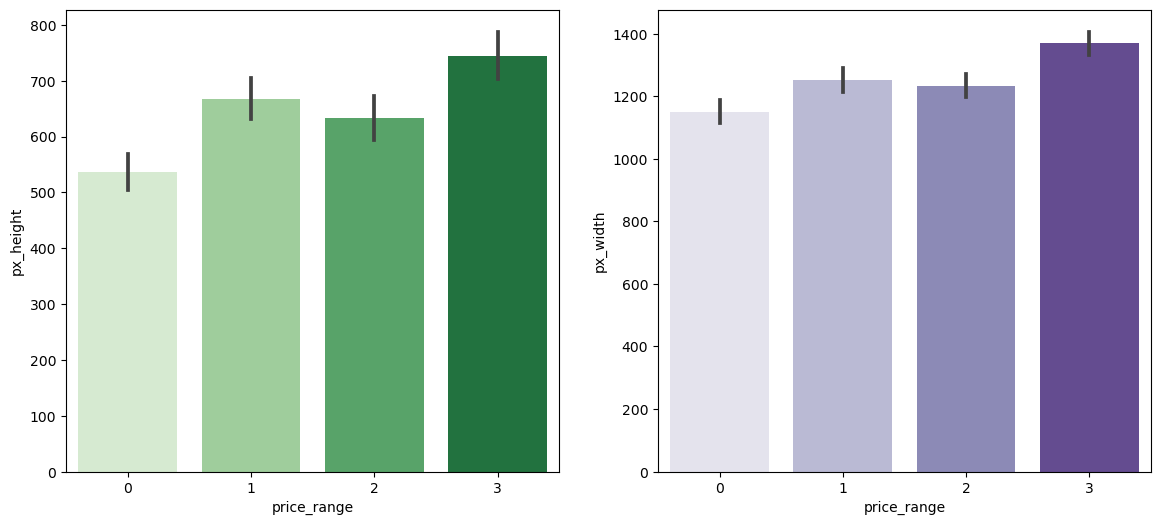

In [14]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=df, palette = 'Greens')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=df, palette = 'Purples')
plt.show()

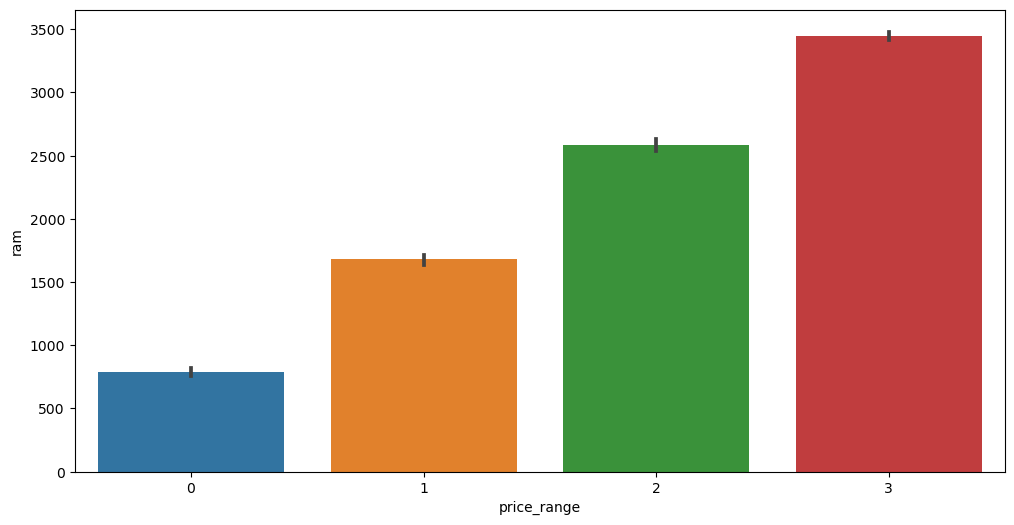

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'price_range',y = 'ram',data=df)
plt.show()

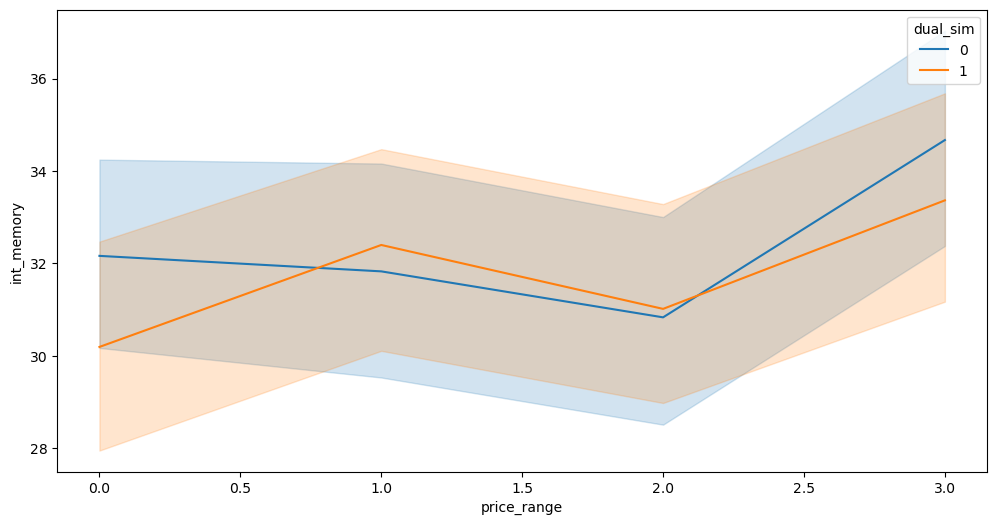

In [16]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range', y = 'int_memory', data = df, hue = 'dual_sim')
plt.show()

In [17]:
X = df.drop(['price_range'],1)
y = df['price_range']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [18]:
#1. KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train.values,y_train)
y_pred1 = knn.predict(X_test)

In [19]:
score1 = f1_score(y_test,y_pred1, average = 'weighted')
model = 'KNightborsClassifier'
print ("The f1score for {} is {:.2f}".format(model,score1))
print(confusion_matrix(y_test, y_pred1))

The f1score for KNightborsClassifier is 0.93
[[149   2   0   0]
 [  5 139   2   0]
 [  0  16 129   3]
 [  0   0  12 143]]


In [20]:
#2. DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred2 = dtree.predict(X_test)

In [21]:
score2 = f1_score(y_test,y_pred2, average = 'weighted')
model = 'DecisionTreeClassifier'
print ("The f1score for {} is {:.2f}".format(model,score2))
print(confusion_matrix(y_test, y_pred2))

The f1score for DecisionTreeClassifier is 0.80
[[132  19   0   0]
 [ 14 115  16   1]
 [  0  24 103  21]
 [  0   0  23 132]]


In [22]:
#3. randomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred3 = RF.predict(X_test)

In [23]:
score3 = f1_score(y_test,y_pred3, average = 'weighted')
model = 'RandomForestClassifier'
print ("The f1score for {} is {:.2f}".format(model,score3))
print(confusion_matrix(y_test, y_pred3))

The f1score for RandomForestClassifier is 0.87
[[144   7   0   0]
 [  9 129   8   0]
 [  0  22 111  15]
 [  0   0  18 137]]


In [24]:
#4. LinearDiscriminantAnalysis
Lda = LinearDiscriminantAnalysis()
Lda.fit(X_train,y_train)
y_pred4 = Lda.predict(X_test)

In [25]:
score4 = f1_score(y_test,y_pred4, average = 'weighted')
model = 'LinearDiscriminantAnalysis'
print ("The f1score for {} is {:.2f}".format(model,score4))
print(confusion_matrix(y_test, y_pred4))

The f1score for LinearDiscriminantAnalysis is 0.93
[[142   9   0   0]
 [  1 142   3   0]
 [  0  11 135   2]
 [  0   0  14 141]]


In [26]:
#5. NaiveBayesClassifier
Nb =  MultinomialNB()
Nb.fit(X_train,y_train)
y_pred5 = Nb.predict(X_test)

In [27]:
score5 = f1_score(y_test,y_pred5, average = 'weighted')
model = 'MultinomialNB'
print ("The f1score for {} is {:.2f}".format(model,score5))
print(confusion_matrix(y_test, y_pred5))

The f1score for MultinomialNB is 0.53
[[119  24   7   1]
 [ 37  60  33  16]
 [  6  35  47  60]
 [  0  17  39  99]]


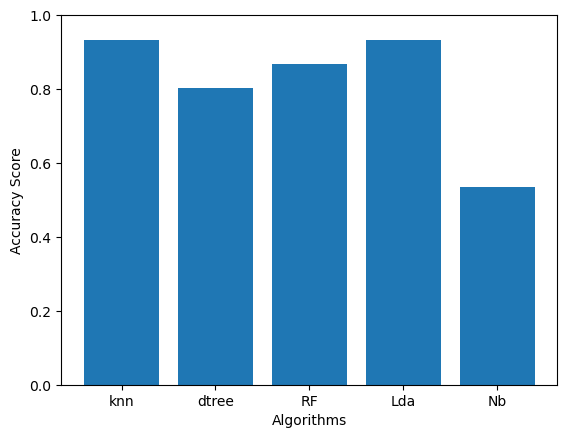

In [28]:
plt.bar(x=['knn','dtree','RF','Lda','Nb'],height=[score1,score2,score3,score4,score5])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.ylim((None,1))
plt.show()

In [29]:
X_test = df_test.drop(['id'],1)
price_range_test = knn.predict(X_test)

In [30]:
prediction = pd.DataFrame(price_range_test,index=df_test.id, columns = ['price_range'])
prediction.to_csv("Price_Range_Test.csv")

In [31]:
pickle.dump(knn, open('model.pkl', 'wb'))